<a href="https://colab.research.google.com/github/Digvijay25/PyTorch-Deep-Learning-Bootcamp/blob/main/02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [389]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [390]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [391]:
# prompt: Using dataframe circles: scatter plot

import altair as alt

# Create a scatter plot
alt.Chart(circles).mark_circle().encode(
    x='X1',
    y='X2',
    color='label:N'  # Encode color by the 'label' column
)


alt.Chart(...)

In [392]:
circles.label.value_counts()

,count
label,
1,500
0,500


In [393]:
X.shape, y.shape

((1000, 2), (1000,))

In [394]:
import torch
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [395]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [396]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [397]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=5)
    self.layer2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer2(self.layer1(x))

model_0 = CircleModelV0().to(device)
model_0, model_0.state_dict()

(CircleModelV0(
   (layer1): Linear(in_features=2, out_features=5, bias=True)
   (layer2): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('layer1.weight',
               tensor([[ 0.6370,  0.2610],
                       [-0.0792,  0.6174],
                       [-0.3663,  0.4594],
                       [ 0.7007, -0.4877],
                       [-0.4173, -0.7007]])),
              ('layer1.bias',
               tensor([-0.1273, -0.6422, -0.2368,  0.2147,  0.4998])),
              ('layer2.weight',
               tensor([[ 0.2491,  0.2482,  0.1855, -0.2774, -0.3551]])),
              ('layer2.bias', tensor([0.0185]))]))

In [398]:
untrained_preds = model_0(X_test.to(device))
untrained_preds[:10], untrained_preds.shape

(tensor([[ 0.0065],
         [ 0.2069],
         [-0.6874],
         [ 0.2038],
         [-0.9549],
         [-0.8305],
         [-0.0541],
         [-0.2978],
         [-0.6751],
         [ 0.2174]], grad_fn=<SliceBackward0>),
 torch.Size([200, 1]))

In [399]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [400]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


In [401]:
torch.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss: .5f} | Accuracy: {acc: .2f} | Test loss: {test_loss: .5f} | Test acc: {test_acc: .2f}%')


Epoch: 0 | Loss:  0.73896 | Accuracy:  45.88 | Test loss:  0.75128 | Test acc:  48.00%
Epoch: 10 | Loss:  0.73462 | Accuracy:  45.88 | Test loss:  0.74697 | Test acc:  48.00%
Epoch: 20 | Loss:  0.73075 | Accuracy:  46.75 | Test loss:  0.74309 | Test acc:  48.00%
Epoch: 30 | Loss:  0.72728 | Accuracy:  46.38 | Test loss:  0.73960 | Test acc:  47.50%
Epoch: 40 | Loss:  0.72418 | Accuracy:  46.50 | Test loss:  0.73646 | Test acc:  46.50%
Epoch: 50 | Loss:  0.72140 | Accuracy:  47.62 | Test loss:  0.73362 | Test acc:  45.50%
Epoch: 60 | Loss:  0.71891 | Accuracy:  47.88 | Test loss:  0.73106 | Test acc:  46.00%
Epoch: 70 | Loss:  0.71667 | Accuracy:  48.12 | Test loss:  0.72875 | Test acc:  46.50%
Epoch: 80 | Loss:  0.71466 | Accuracy:  48.00 | Test loss:  0.72665 | Test acc:  47.00%
Epoch: 90 | Loss:  0.71285 | Accuracy:  48.12 | Test loss:  0.72475 | Test acc:  47.00%


In [402]:
y_test.shape

torch.Size([200])

In [403]:
import requests
from pathlib import Path
import matplotlib.pyplot as plt

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


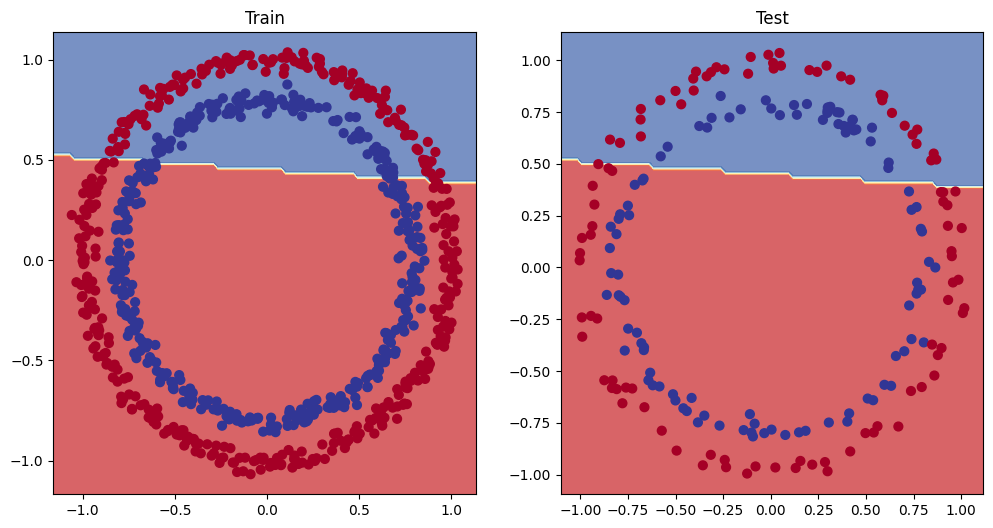

In [404]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [405]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [406]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [407]:
torch.manual_seed(42)
epochs = 3000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  y_acc = accuracy_fn(y_train, y_pred)
  loss = loss_fn(y_logits, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 1000 == 0:
    print(f'Epoch: {epoch} | Loss: {loss: .5f} | Acc: {y_acc: .2f}% | Test Loss: {test_loss: .5f} | Test acc: {test_acc: .2f}%')


Epoch: 0 | Loss:  0.69295 | Acc:  50.00% | Test Loss:  0.69319 | Test acc:  50.00%
Epoch: 1000 | Loss:  0.56818 | Acc:  87.75% | Test Loss:  0.57378 | Test acc:  86.50%
Epoch: 2000 | Loss:  0.04176 | Acc:  99.88% | Test Loss:  0.06583 | Test acc:  100.00%


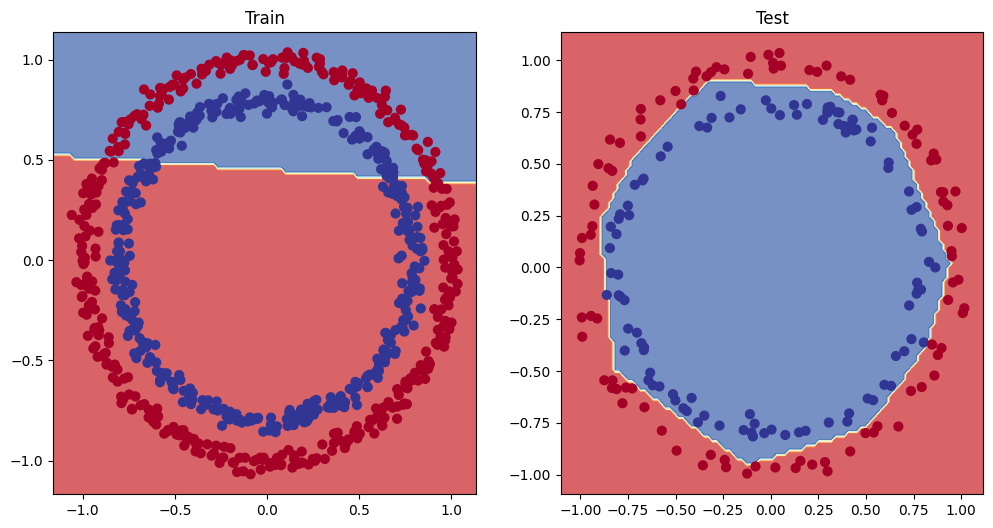

In [408]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

In [409]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [410]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

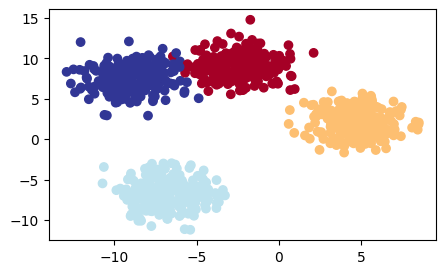

In [411]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(5,3))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [412]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [413]:
from torch import nn

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(NUM_FEATURES, NUM_CLASSES, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [414]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

In [415]:
model_4(X_train).to(device)[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], grad_fn=<SliceBackward0>)

In [416]:
y_logits = model_4(X_train).to(device)

y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:5]

tensor([[0.1838, 0.3422, 0.1500, 0.3239],
        [0.2199, 0.0377, 0.1839, 0.5586],
        [0.3406, 0.0482, 0.5326, 0.0785],
        [0.3405, 0.0657, 0.4446, 0.1492],
        [0.2527, 0.0424, 0.2283, 0.4766]], grad_fn=<SliceBackward0>)

In [417]:
torch.argmax(y_pred_probs[2])

tensor(2)

In [418]:
torch.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
x_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss: .5f} | Acc: {acc: .2f}% | Test Loss: {test_loss: .5f} | Test Acc: {test_acc: .2f}%')

Epoch: 0 | Loss:  1.04324 | Acc:  65.50% | Test Loss:  0.57861 | Test Acc:  95.50%
Epoch: 10 | Loss:  0.14398 | Acc:  99.12% | Test Loss:  0.13037 | Test Acc:  99.00%
Epoch: 20 | Loss:  0.08062 | Acc:  99.12% | Test Loss:  0.07216 | Test Acc:  99.50%
Epoch: 30 | Loss:  0.05924 | Acc:  99.12% | Test Loss:  0.05133 | Test Acc:  99.50%
Epoch: 40 | Loss:  0.04892 | Acc:  99.00% | Test Loss:  0.04098 | Test Acc:  99.50%
Epoch: 50 | Loss:  0.04295 | Acc:  99.00% | Test Loss:  0.03486 | Test Acc:  99.50%
Epoch: 60 | Loss:  0.03910 | Acc:  99.00% | Test Loss:  0.03083 | Test Acc:  99.50%
Epoch: 70 | Loss:  0.03643 | Acc:  99.00% | Test Loss:  0.02799 | Test Acc:  99.50%
Epoch: 80 | Loss:  0.03448 | Acc:  99.00% | Test Loss:  0.02587 | Test Acc:  99.50%
Epoch: 90 | Loss:  0.03300 | Acc:  99.12% | Test Loss:  0.02423 | Test Acc:  99.50%


In [419]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test)

y_logits[:5]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186]])

In [420]:
y_pred_probs = torch.softmax(y_logits, dim=1)

y_preds = y_pred_probs.argmax(dim=1)
y_preds[:5]

tensor([1, 3, 2, 1, 0])

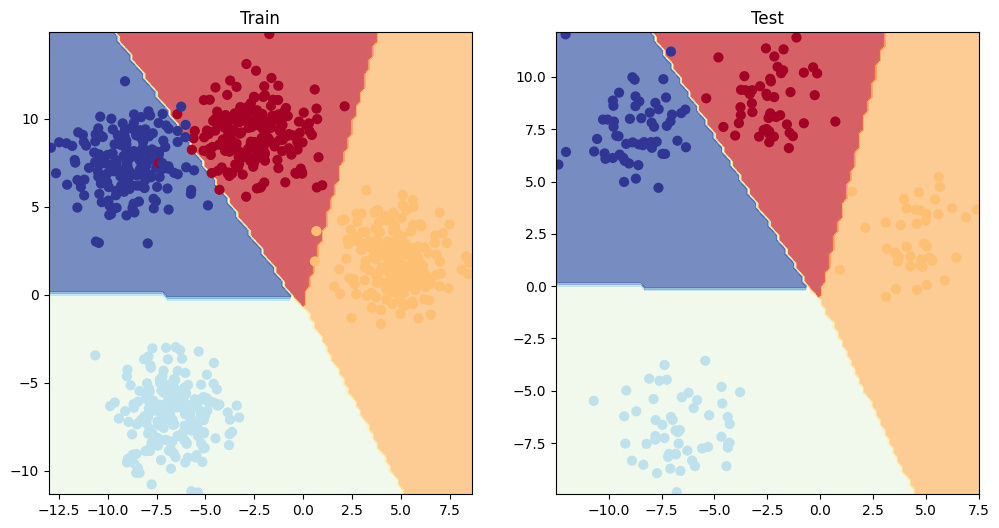

In [421]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)

# Exercise

In [422]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [423]:
X, y = make_moons(n_samples=1000, noise=0.1)
X.shape, y.shape

((1000, 2), (1000,))

In [424]:
X = torch.from_numpy(X).to(device).type(torch.float)
y = torch.from_numpy(y).to(device).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

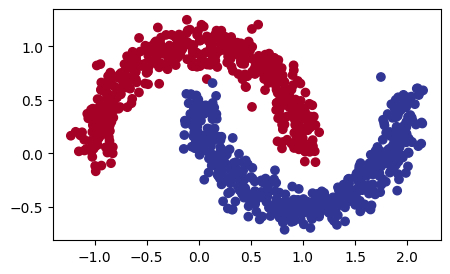

In [425]:
plt.figure(figsize=(5,3))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [426]:
X[:0].shape, X[:1].shape, y.shape

(torch.Size([0, 2]), torch.Size([1, 2]), torch.Size([1000]))

In [427]:
class MakeMoonsModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=16)
    self.layer2 = nn.Linear(in_features=16, out_features=16)
    self.layer3 = nn.Linear(in_features=16, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_5 = MakeMoonsModel()
model_5


MakeMoonsModel(
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [428]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_5.parameters(), lr=0.1)

In [429]:
epochs = 1600

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_5.train()
  y_logits = model_5(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 160 == 0:
    print(f'Epoch: {epoch} | Loss: {loss: .5f} | Acc: {acc: .2f}% | Test Loss: {test_loss: .5f} | Test Acc: {test_acc: .2f}%')

Epoch: 0 | Loss:  0.69548 | Acc:  49.50% | Test Loss:  0.68569 | Test Acc:  52.00%
Epoch: 160 | Loss:  0.25010 | Acc:  89.00% | Test Loss:  0.27930 | Test Acc:  85.50%
Epoch: 320 | Loss:  0.22420 | Acc:  89.50% | Test Loss:  0.25289 | Test Acc:  86.00%
Epoch: 480 | Loss:  0.20881 | Acc:  89.62% | Test Loss:  0.23420 | Test Acc:  86.50%
Epoch: 640 | Loss:  0.18619 | Acc:  90.75% | Test Loss:  0.20772 | Test Acc:  88.50%
Epoch: 800 | Loss:  0.13818 | Acc:  93.50% | Test Loss:  0.15299 | Test Acc:  94.00%
Epoch: 960 | Loss:  0.07719 | Acc:  97.62% | Test Loss:  0.08524 | Test Acc:  98.00%
Epoch: 1120 | Loss:  0.04283 | Acc:  99.38% | Test Loss:  0.04809 | Test Acc:  99.00%
Epoch: 1280 | Loss:  0.02784 | Acc:  99.50% | Test Loss:  0.03166 | Test Acc:  100.00%
Epoch: 1440 | Loss:  0.02046 | Acc:  99.75% | Test Loss:  0.02343 | Test Acc:  100.00%


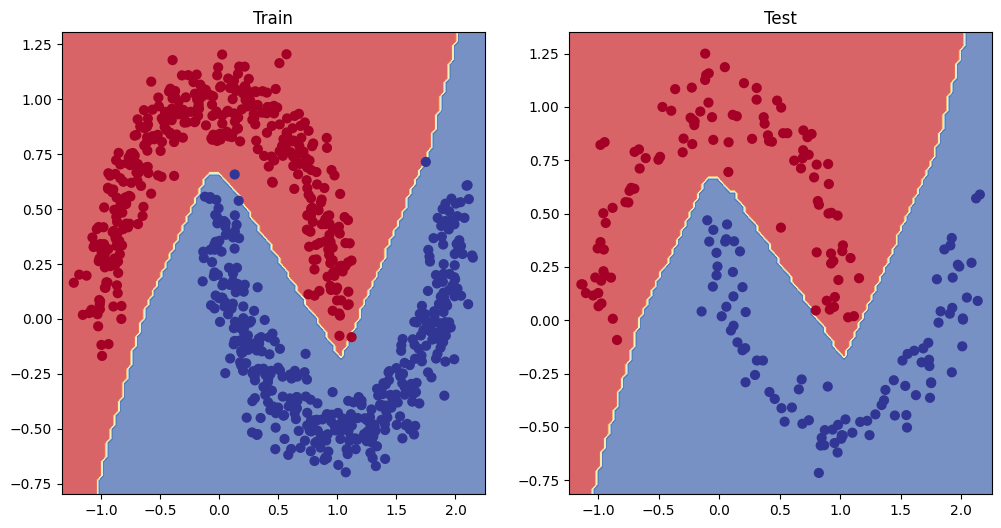

In [430]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X_test, y_test)

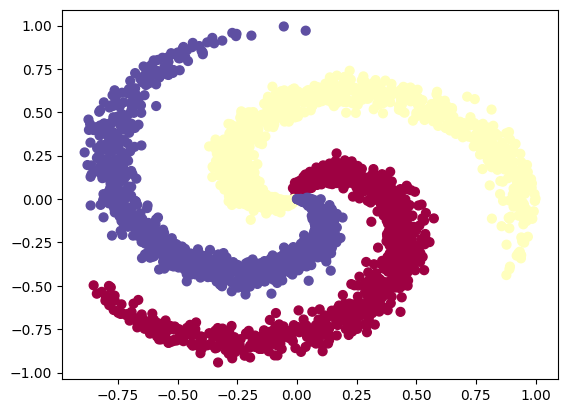

In [431]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 1000 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [432]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X.shape, y.shape

(torch.Size([3000, 2]), torch.Size([3000]))

In [433]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

X_train.shape, X_test.shape

(torch.Size([2400, 2]), torch.Size([600, 2]))

In [434]:
# Change the type of y_train and y_test to LongTensor
y_train = y_train.type(torch.LongTensor)
y_test = y_test.type(torch.LongTensor)

In [435]:
class CS231nModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=16)
    self.layer2 = nn.Linear(in_features=16, out_features=16)
    self.layer3 = nn.Linear(in_features=16, out_features=3)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_6 = CS231nModel().to(device)
model_6

CS231nModel(
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=3, bias=True)
  (relu): ReLU()
)

In [436]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_6.parameters(), lr=0.01)

In [437]:
model_6.eval()
with torch.inference_mode():
  y_logits = model_6(X_train)

y_logits[:5]

tensor([[-0.2009,  0.0654,  0.1615],
        [-0.2091,  0.0474,  0.1903],
        [-0.1892,  0.0990,  0.1224],
        [-0.2040,  0.0764,  0.1738],
        [-0.2489,  0.0323,  0.2323]])

In [438]:
y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_pred[:5]

tensor([2, 2, 2, 2, 2])

In [439]:
y_train[:5]

tensor([1, 2, 1, 0, 0])

In [440]:
epochs = 20000

for epoch in range(epochs):
  model_6.train()
  y_logits = model_6(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_6.eval()
  with torch.inference_mode():
    test_logits = model_6(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_train, y_pred)

  if epoch % 1000 == 0:
    print(f'Epoch: {epoch} | Loss: {loss: .5f} | Acc: {acc: .2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%')

Epoch: 0 | Loss:  1.11997 | Acc:  27.58% | Test Loss: 1.11120 | Test Acc: 27.58%
Epoch: 1000 | Loss:  0.97687 | Acc:  49.08% | Test Loss: 0.98453 | Test Acc: 49.08%
Epoch: 2000 | Loss:  0.80348 | Acc:  54.42% | Test Loss: 0.80739 | Test Acc: 54.42%
Epoch: 3000 | Loss:  0.70508 | Acc:  58.83% | Test Loss: 0.70591 | Test Acc: 58.83%
Epoch: 4000 | Loss:  0.65708 | Acc:  62.54% | Test Loss: 0.65865 | Test Acc: 62.54%
Epoch: 5000 | Loss:  0.61699 | Acc:  66.12% | Test Loss: 0.61940 | Test Acc: 66.12%
Epoch: 6000 | Loss:  0.58022 | Acc:  69.54% | Test Loss: 0.58399 | Test Acc: 69.54%
Epoch: 7000 | Loss:  0.54576 | Acc:  71.96% | Test Loss: 0.55019 | Test Acc: 71.96%
Epoch: 8000 | Loss:  0.51319 | Acc:  74.04% | Test Loss: 0.51642 | Test Acc: 74.04%
Epoch: 9000 | Loss:  0.47975 | Acc:  74.96% | Test Loss: 0.48004 | Test Acc: 74.96%
Epoch: 10000 | Loss:  0.43949 | Acc:  76.62% | Test Loss: 0.43530 | Test Acc: 76.62%
Epoch: 11000 | Loss:  0.37958 | Acc:  81.46% | Test Loss: 0.37180 | Test Acc: 

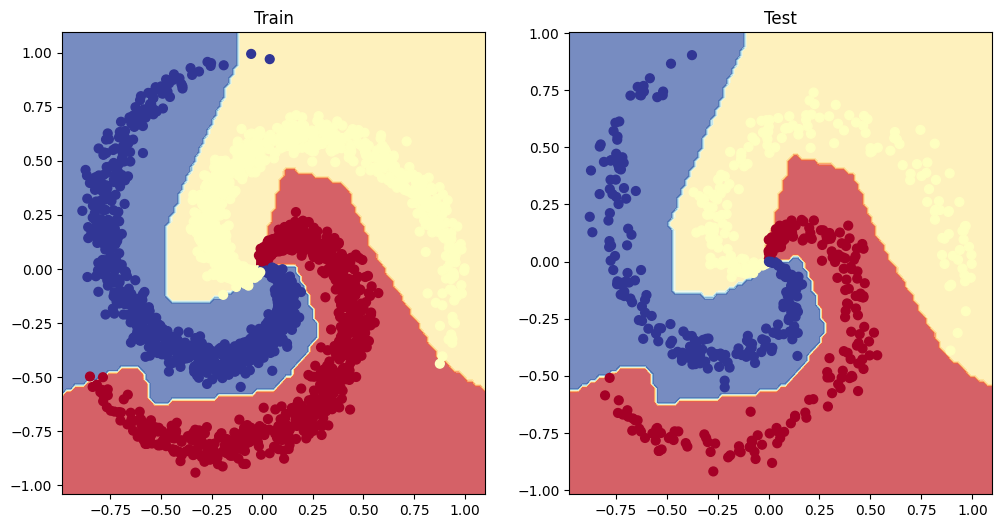

In [441]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X_test, y_test)